In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import scipy
import os
import process_supplemental_data as supp_processor
import random
import tensorflow as tf

random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
%load_ext autoreload
%autoreload 2



In [10]:
supp_data_dict = supp_processor.load_all_supplemental_files()

In [11]:
supp_data_dict['s5_mutations'].head(5)

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Plasma_volume_(mL),Plasma_DNA_concentration,Mutation_identified_in_plasma,omega_score,Mutant_AF,per_mL_plasma,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result
0,CRC_455,CRC_455_PLS_1,Colorectum,I,5.0,6.08,"TP53 p.K120E, c.358A>G",2.96,0.27,5.1,0.938,Positive
1,CRC_456,CRC_456_PLS_1,Colorectum,I,4.0,46.01,"TP53 p.S240I, c.719G>T",2.45,0.02,3.2,0.925,Positive
2,CRC_457,CRC_457_PLS_1,Colorectum,II,4.5,6.94,"TP53 p.R202C, c.604C>T",1.22,0.06,1.4,0.852,Negative
3,CRC_458,CRC_458_PLS_1,Colorectum,II,7.5,7.15,"TP53 p.R248Q, c.743G>A",1.64,0.16,3.6,0.618,Negative
4,CRC_459,CRC_459_PLS_1,Colorectum,II,5.0,9.81,"TP53 p.A276G, c.827C>G",1.33,0.08,2.5,0.318,Negative


In [18]:
supp_data_dict['s6_protein_conc'].head(5)

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,AFP,Angiopoietin-2,AXL,CA-125,CA_15-3,CA19-9,...,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result
0,CRC_455,CRC_455_PLS_1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938,True
1,CRC_456,CRC_456_PLS_1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925,True
2,CRC_457,CRC_457_PLS_1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852,False
3,CRC_458,CRC_458_PLS_1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.618,False
4,CRC_459,CRC_459_PLS_1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318,False


In [15]:
supp_data_dict['s2_mutations'].columns

Index(['Patient_ID', 'Sample_ID', 'Tumor_type', 'AJCC_Stage',
       'Mutation_identified_in_tumor_tissue', 'Mutant_MAF'],
      dtype='object')

In [16]:
supp_data_dict['s2_mutations']

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,Mutation_identified_in_tumor_tissue,Mutant_MAF
0,CRC_456,CRC_456_PT1,Colorectum,I,"KRAS p.G13D, c.38G>A",0.2544
1,CRC_457,CRC_457_PT1,Colorectum,II,"TP53 p.Q331Q, c.993G>A (Exon End)",0.2897
2,CRC_457,CRC_457_PT1,Colorectum,II,"BRAF p.V600E, c.1799T>A",0.2263
3,CRC_458,CRC_458_PT1,Colorectum,II,"TP53 p.R248Q, c.743G>A",0.5194
4,CRC_459,CRC_459_PT1,Colorectum,II,"TP53 p.A276G, c.827C>G",0.5219
...,...,...,...,...,...,...
1019,PANCA_1149,PANCA_1149_PT1,Pancreas,II,"KRAS p.G12V, c.35G>T",0.0912
1020,PANCA_1152,PANCA_1152_PT1,Pancreas,I,"TP53 p.R282W, c.844C>T",0.3092
1021,PANCA_1152,PANCA_1152_PT1,Pancreas,I,"KRAS p.G12D, c.35G>A",0.1845
1022,PANCA_1153,PANCA_1153_PT1,Pancreas,II,"KRAS p.G12D, c.35G>A",0.0872


In [19]:
supp_data_dict['s4_clinical_characteristics']

,Patient_ID,Plasma_sample_ID,Primary_tumor_sample_ID,Age,Sex,Race,Tumor_type,AJCC_Stage,Histopathology,Plasma_volume_(mL),Plasma_DNA_concentration,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result
0,CRC_455,CRC 455 PLS 1,Not_available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.08,0.938,True
1,CRC_456,CRC 456 PLS 1,CRC_456_PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.01,0.925,True
2,CRC_457,CRC 457 PLS 1,CRC_457_PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,False
3,CRC_458,CRC 458 PLS 1,CRC_458_PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,False
4,CRC_459,CRC 459 PLS 1,CRC_459_PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.81,0.318,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA_1353,PAPA 1353 PLS 1,Not_available,55,Female,Caucasian,Ovary,I,Epithelial carcinoma,3.5,6.55,0.980,True
1813,PAPA_1354,PAPA 1354 PLS 1,Not_available,57,Female,Caucasian,Ovary,I,Epithelial carcinoma,3.5,22.83,1.000,True
1814,PAPA_1355,PAPA 1355 PLS 1,Not_available,60,Female,Caucasian,Ovary,III,Epithelial carcinoma,3.5,64.51,1.000,True
1815,PAPA_1356,PAPA 1356 PLS 1,Not_available,49,Female,Caucasian,Ovary,II,Epithelial carcinoma,3.5,13.71,1.000,True


# Recreate performance plots

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import scipy
import os
import process_supplemental_data as supp_processor
import models
import plotting

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# New cells to fit models and generate plots
# Load the supplemental data
supp_data_dict = supp_processor.load_all_supplemental_files()

# Create a DataFrame with patient information
clinical_df = supp_data_dict['s4_clinical_characteristics']
mutations_df = supp_data_dict['s5_mutations']
protein_df = supp_data_dict['s6_protein_conc']

# Create binary target: cancer vs. normal
clinical_df['is_cancer'] = (clinical_df['Tumor_type'] != 'Normal').astype(int)


In [8]:
clinical_df.head(5)

,Patient_ID,Plasma_sample_ID,Primary_tumor_sample_ID,Age,Sex,Race,Tumor_type,AJCC_Stage,Histopathology,Plasma_volume_(mL),Plasma_DNA_concentration,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result,is_cancer
0,CRC_455,CRC 455 PLS 1,Not_available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.08,0.938,True,1
1,CRC_456,CRC 456 PLS 1,CRC_456_PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.01,0.925,True,1
2,CRC_457,CRC 457 PLS 1,CRC_457_PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,False,1
3,CRC_458,CRC 458 PLS 1,CRC_458_PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,False,1
4,CRC_459,CRC 459 PLS 1,CRC_459_PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.81,0.318,False,1


In [18]:
protein_df.columns

Index(['Patient_ID', 'Sample_ID', 'Tumor_type', 'AJCC_Stage', 'AFP',
       'Angiopoietin-2', 'AXL', 'CA-125', 'CA_15-3', 'CA19-9', 'CD44', 'CEA',
       'CYFRA_21-1', 'DKK1', 'Endoglin', 'FGF2', 'Follistatin', 'Galectin-3',
       'G-CSF', 'GDF15', 'HE4', 'HGF', 'IL-6', 'IL-8', 'Kallikrein-6',
       'Leptin', 'Mesothelin', 'Midkine', 'Myeloperoxidase', 'NSE', 'OPG',
       'OPN', 'PAR', 'Prolactin', 'sEGFR', 'sFas', 'SHBG',
       'sHER2/sEGFR2/sErbB2', 'sPECAM-1', 'TGFa', 'Thrombospondin-2', 'TIMP-1',
       'TIMP-2', 'CancerSEEK_Logistic_Regression_Score',
       'CancerSEEK_Test_Result'],
      dtype='object')

In [37]:


# New cells to fit models and generate plots
# Load the supplemental data
supp_data_dict = supp_processor.load_all_supplemental_files()

# Create a DataFrame with patient information
clinical_df = supp_data_dict['s4_clinical_characteristics']
mutations_df = supp_data_dict['s5_mutations']
protein_df = supp_data_dict['s6_protein_conc']

# Create binary target: cancer vs. normal
clinical_df['is_cancer'] = (clinical_df['Tumor_type'] != 'Normal').astype(int)

# Merge protein and mutation data with patient info
data_df = clinical_df.merge(protein_df, on=['Patient_ID', 'Sample_ID', 'Tumor_type', 'AJCC_Stage'], how='left')

# Check for missing omega_score and add it from mutations_df if available
if 'omega_score' not in data_df.columns:
    # Extract relevant columns from mutations_df
    omega_df = mutations_df[['Patient_ID', 'Sample_ID', 'omega_score']].drop_duplicates()
    # Merge with data_df
    data_df = data_df.merge(omega_df, on=['Patient_ID', 'Sample_ID'], how='left')
    # Fill missing omega_score with 0 (no mutation detected)
    data_df['omega_score'] = data_df['omega_score'].fillna(0)

# Create arrays for modeling
X = data_df.copy()
y_cancer_status = data_df['is_cancer']
y_cancer_type = data_df['Tumor_type']

# Proteins from the paper for LR model (based on the paper)
lr_proteins = ['CA-125', 'CA19-9', 'CEA', 'HGF', 'MPO', 'OPN', 'PRL', 'TIMP-1']


In [41]:
has_na = protein_df.isnull().values.any()
print(has_na)

True


In [48]:
rows_with_na = protein_df[protein_df.isna().any(axis=1)]
print(rows_with_na)

Empty DataFrame
Columns: [Patient_ID, Sample_ID, Tumor_type, AJCC_Stage, AFP, Angiopoietin-2, AXL, CA-125, CA_15-3, CA19-9, CD44, CEA, CYFRA_21-1, DKK1, Endoglin, FGF2, Follistatin, Galectin-3, G-CSF, GDF15, HE4, HGF, IL-6, IL-8, Kallikrein-6, Leptin, Mesothelin, Midkine, Myeloperoxidase, NSE, OPG, OPN, PAR, Prolactin, sEGFR, sFas, SHBG, sHER2/sEGFR2/sErbB2, sPECAM-1, TGFa, Thrombospondin-2, TIMP-1, TIMP-2, CancerSEEK_Logistic_Regression_Score, CancerSEEK_Test_Result]
Index: []

[0 rows x 45 columns]


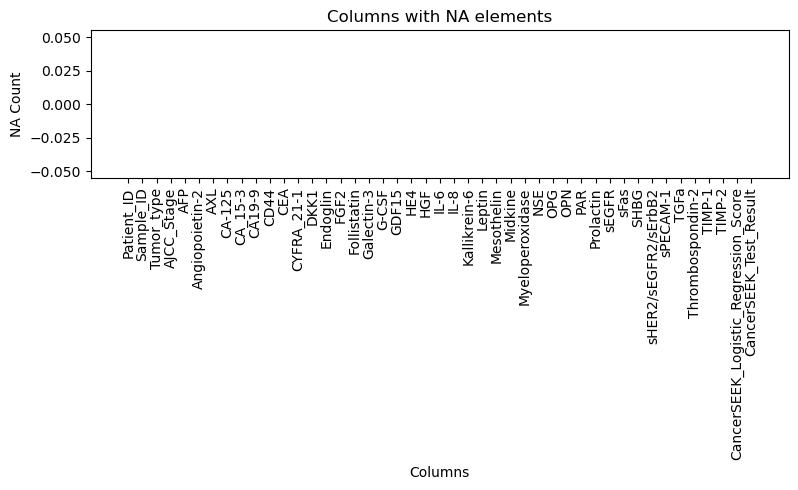

In [55]:

na_counts = protein_df.isna().sum()

# Create a bar plot for NA counts
plt.figure(figsize=(8, 5))
plt.bar(na_counts.index, na_counts.values)
plt.title("Columns with NA elements")
plt.xlabel("Columns")
plt.ylabel("NA Count")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to make room for labels
plt.show()

In [44]:
protein_df.head(5)

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,AFP,Angiopoietin-2,AXL,CA-125,CA_15-3,CA19-9,...,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result
0,CRC_455,CRC_455_PLS_1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938,True
1,CRC_456,CRC_456_PLS_1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925,True
2,CRC_457,CRC_457_PLS_1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852,False
3,CRC_458,CRC_458_PLS_1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.618,False
4,CRC_459,CRC_459_PLS_1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318,False


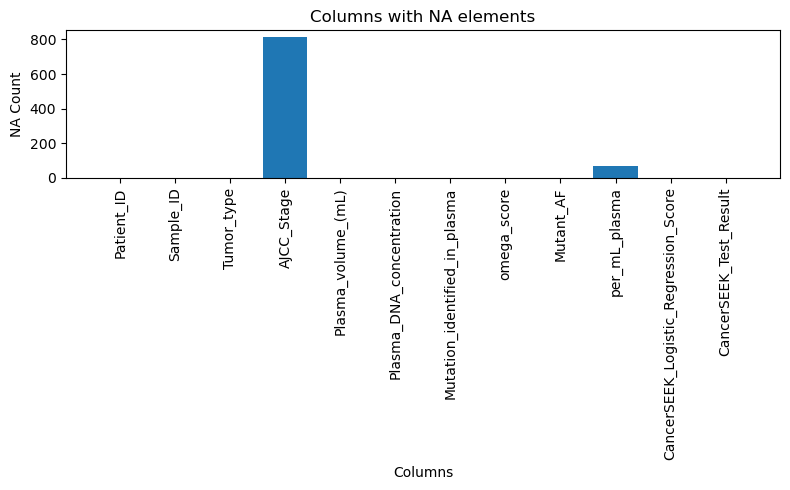

In [56]:

na_counts = mutations_df.isna().sum()

# Create a bar plot for NA counts
plt.figure(figsize=(8, 5))
plt.bar(na_counts.index, na_counts.values)
plt.title("Columns with NA elements")
plt.xlabel("Columns")
plt.ylabel("NA Count")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to make room for labels
plt.show()

In [58]:
clinical_df.head(5)

,Patient_ID,Sample_ID,Primary_tumor_sample_ID,Age,Sex,Race,Tumor_type,AJCC_Stage,Histopathology,Plasma_volume_(mL),Plasma_DNA_concentration,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result,is_cancer
0,CRC_455,CRC_455_PLS_1,Not_available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.08,0.938,True,1
1,CRC_456,CRC_456_PLS_1,CRC_456_PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.01,0.925,True,1
2,CRC_457,CRC_457_PLS_1,CRC_457_PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,False,1
3,CRC_458,CRC_458_PLS_1,CRC_458_PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,False,1
4,CRC_459,CRC_459_PLS_1,CRC_459_PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.81,0.318,False,1


In [ ]:
# New cells to fit models and generate plots
# Load the supplemental data
supp_data_dict = supp_processor.load_all_supplemental_files()

# Create a DataFrame with patient information
clinical_df = supp_data_dict['s4_clinical_characteristics']
mutations_df = supp_data_dict['s5_mutations']
protein_df = supp_data_dict['s6_protein_conc']

# Create binary target: cancer vs. normal
clinical_df['is_cancer'] = (clinical_df['Tumor_type'] != 'Normal').astype(int)

# Merge protein and mutation data with patient info
data_df = clinical_df.merge(protein_df, on=['Patient_ID', 'Sample_ID', 'Tumor_type', 'AJCC_Stage'], how='left')

# Check for missing omega_score and add it from mutations_df if available
if 'omega_score' not in data_df.columns:
    # Extract relevant columns from mutations_df
    omega_df = mutations_df[['Patient_ID', 'Sample_ID', 'omega_score']].drop_duplicates()
    # Merge with data_df
    data_df = data_df.merge(omega_df, on=['Patient_ID', 'Sample_ID'], how='left')
    # Fill missing omega_score with 0 (no mutation detected)
    data_df['omega_score'] = data_df['omega_score'].fillna(0)

# Create arrays for modeling
X = data_df.copy()
y_cancer_status = data_df['is_cancer']
y_cancer_type = data_df['Tumor_type']

# Proteins from the paper for LR model (based on the paper)
lr_proteins = ['CA-125', 'CA19-9', 'CEA', 'HGF', 'Myeloperoxidase', 'OPN', 'Prolactin', 'TIMP-1']


In [67]:
clinical_df.head(5)

,Patient_ID,Sample_ID,Primary_tumor_sample_ID,Age,Sex,Race,Tumor_type,AJCC_Stage,Histopathology,Plasma_volume_(mL),Plasma_DNA_concentration,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result,is_cancer
0,CRC_455,CRC_455_PLS_1,Not_available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,6.08,0.938,True,1
1,CRC_456,CRC_456_PLS_1,CRC_456_PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,46.01,0.925,True,1
2,CRC_457,CRC_457_PLS_1,CRC_457_PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,6.94,0.852,False,1
3,CRC_458,CRC_458_PLS_1,CRC_458_PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,7.15,0.618,False,1
4,CRC_459,CRC_459_PLS_1,CRC_459_PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,9.81,0.318,False,1


In [68]:
protein_df.head(5)

,Patient_ID,Sample_ID,Tumor_type,AJCC_Stage,AFP,Angiopoietin-2,AXL,CA-125,CA_15-3,CA19-9,...,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,CancerSEEK_Logistic_Regression_Score,CancerSEEK_Test_Result
0,CRC_455,CRC_455_PLS_1,Colorectum,I,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938,True
1,CRC_456,CRC_456_PLS_1,Colorectum,I,715.308,20936.35,2772.96,7.270,10.04,40.910,...,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925,True
2,CRC_457,CRC_457_PLS_1,Colorectum,II,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852,False
3,CRC_458,CRC_458_PLS_1,Colorectum,II,715.308,1604.34,2029.96,5.390,8.31,16.452,...,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.618,False
4,CRC_459,CRC_459_PLS_1,Colorectum,II,801.300,2087.57,2069.17,4.854,11.73,16.452,...,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318,False


In [69]:
data_df.head(5)

,Patient_ID,Sample_ID,Primary_tumor_sample_ID,Age,Sex,Race,Tumor_type,AJCC_Stage_x,Histopathology,Plasma_volume_(mL),...,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,CancerSEEK_Logistic_Regression_Score_y,CancerSEEK_Test_Result_y,omega_score
0,CRC_455,CRC_455_PLS_1,Not_available,60,Male,Caucasian,Colorectum,I,Adenocarcinoma,5.0,...,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938,True,2.96
1,CRC_456,CRC_456_PLS_1,CRC_456_PT1,59,Female,Caucasian,Colorectum,I,Adenocarcinoma,4.0,...,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925,True,2.45
2,CRC_457,CRC_457_PLS_1,CRC_457_PT1,69,Female,Caucasian,Colorectum,II,Adenocarcinoma,4.5,...,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852,False,1.22
3,CRC_458,CRC_458_PLS_1,CRC_458_PT1,70,Female,Caucasian,Colorectum,II,Adenocarcinoma,7.5,...,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.618,False,1.64
4,CRC_459,CRC_459_PLS_1,CRC_459_PT1,43,Female,Caucasian,Colorectum,II,Adenocarcinoma,5.0,...,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318,False,1.33


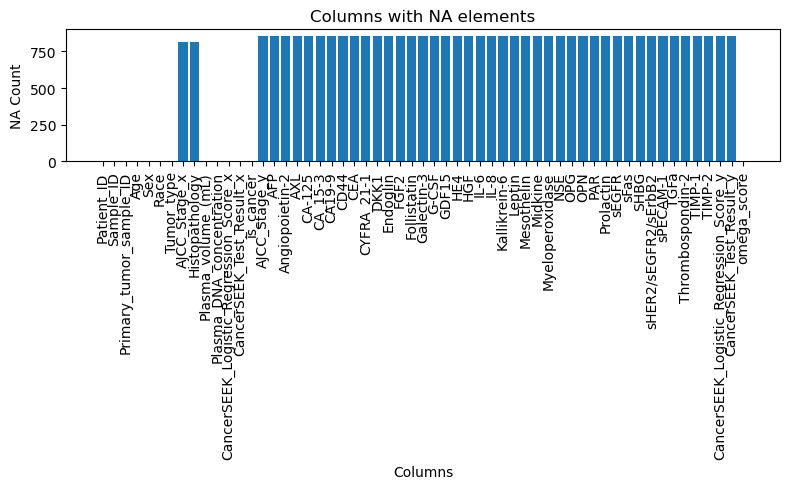

In [66]:
na_counts = data_df.isna().sum()

# Create a bar plot for NA counts
plt.figure(figsize=(8, 5))
plt.bar(na_counts.index, na_counts.values)
plt.title("Columns with NA elements")
plt.xlabel("Columns")
plt.ylabel("NA Count")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to make room for labels
plt.show()

In [62]:

# Normalize protein data
protein_features = [col for col in X.columns if col not in 
                  ['Patient_ID', 'Sample_ID', 'Tumor_type', 'AJCC_Stage', 
                   'CancerSEEK_Logistic_Regression_Score', 'CancerSEEK_Test_Result',
                   'is_cancer', 'omega_score']]

# Fit the combined model
combined_results = models.combined_cancer_detection_and_localization(
    X, y_cancer_status, y_cancer_type, clinical_df=clinical_df,
    outer_splits=10, inner_splits=5, random_state=42
)

# Plot ROC curve for the logistic regression model
fig_roc, ax_roc = plotting.plot_roc_curve(
    y_cancer_status, 
    combined_results['detection_results']['probabilities'],
    title="ROC Curve for CancerSEEK"
)
plt.tight_layout()
plt.show()

# Calculate sensitivity at 98.5% specificity for all cancers and by subtype
sensitivity_by_subtype = plotting.calculate_sensitivity_by_subtype(
    y_cancer_status,
    combined_results['detection_results']['probabilities'],
    data_df['Tumor_type'],
    target_specificity=0.985
)

# Plot sensitivity by cancer type
fig_subtype, ax_subtype = plotting.plot_sensitivity_by_subtype(
    sensitivity_by_subtype,
    figsize=(12, 6)
)
plt.tight_layout()
plt.show()

# Calculate sensitivity by cancer stage
sensitivity_by_stage = plotting.calculate_sensitivity_by_stage(
    y_cancer_status,
    combined_results['detection_results']['probabilities'],
    data_df['AJCC_Stage'],
    target_specificity=0.985
)

# Plot sensitivity by cancer stage
fig_stage, ax_stage = plotting.plot_sensitivity_by_stage(
    sensitivity_by_stage,
    figsize=(10, 6)
)
plt.tight_layout()
plt.show()

# Plot tissue localization accuracy (Fig 3 in the paper)
# We need to filter to only positive samples identified by CancerSEEK
# First, get threshold at 98.5% specificity
sensitivity_result = plotting.calculate_sensitivity_at_specificity(
    y_cancer_status,
    combined_results['detection_results']['probabilities'],
    target_specificity=0.985
)
threshold = sensitivity_result['threshold']

# Identify positive samples according to CancerSEEK threshold
positive_indices = np.where(
    (combined_results['detection_results']['probabilities'] >= threshold) & 
    (y_cancer_status == 1)
)[0]

# Filter data for tissue localization plot
y_true_filtered = [y_cancer_type.iloc[i] for i in positive_indices]

# Extract cancer types (excluding 'Normal')
cancer_types = [t for t in y_cancer_type.unique() if t != 'Normal']

# If we have probabilities from the RF model
if combined_results['localization_results'] is not None:
    # Extract predictions for positive samples
    y_pred_proba = {}
    
    for i, idx in enumerate(positive_indices):
        if idx in combined_results['localization_results']['predictions'].index:
            # Create probability dict for this sample
            proba_dict = {}
            for cancer_type in cancer_types:
                # Get predicted probabilities for each cancer type
                # This is a simplification as we don't have actual probabilities
                if cancer_type == combined_results['localization_results']['predictions'].loc[idx]:
                    proba_dict[cancer_type] = 0.9  # High probability for predicted class
                else:
                    proba_dict[cancer_type] = 0.1 / (len(cancer_types) - 1)  # Distribute remaining probability
            
            y_pred_proba[i] = proba_dict
    
    # Plot tissue localization accuracy
    fig_loc, ax_loc = plotting.plot_tissue_localization_accuracy(
        y_true_filtered,
        y_pred_proba,
        cancer_types=cancer_types,
        figsize=(12, 8)
    )
    plt.tight_layout()
    plt.show()
else:
    print("No localization results available.")

ValueError: 
All the 210 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
